In [15]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from pathlib import Path
home_path = '/home/eromanenkova/'

In [17]:
import sys
sys.path.append('/home/eromanenkova/')
sys.path.append('/home/eromanenkova/mds20_replearning')

In [18]:
from mds20_replearning.scripts.skip_thoughts.pl_model import SkipThoughtsModule
from mds20_replearning.data.language.load import load_data

In [19]:
model = SkipThoughtsModule(vocab_size=20000, embedding_dim=620, encoder_dim=2400, lr=2e-4) 

In [20]:
model = model.load_from_checkpoint(checkpoint_path="2epochs_stv_loss_2_276.ckpt")

In [21]:
from mds20_replearning.scripts.pl_data import DefaultDataModule

In [22]:
import pickle
with open('/home/eromanenkova/mds20_replearning/notebooks/w2i_mapping.pickle', 'rb') as f:
    predefined_vocab_mapping = pickle.load(f)

In [23]:
!pip install gensim

In [24]:
import gensim

/home/eromanenkova/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [25]:
# Load the Word2Vec model
word2vec_path = "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
print('Loading word2vec vectors at {}'.format(word2vec_path))
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

Loading word2vec vectors at https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import torch

def get_model_embedding(embedding_layer, vocab_for_model):
    model_embedding = []
    for ind in vocab_for_model.values():
        model_embedding.append(embedding_layer(torch.LongTensor([ind]).reshape(1, 1)).squeeze().tolist())
    model_embedding = np.array(model_embedding)
    return model_embedding

def vocabulary_expansion(linear_model, embedding_layer, vocab_for_model, word2vec):
    model_embedding = get_model_embedding(embedding_layer, vocab_for_model)
    
    shared_words = [w for w in word2vec.vocab if w in vocab_for_model]    
    shared_model_emb = model_embedding[[vocab_for_model[w] for w in shared_words]]
    shared_w2v_emb = word2vec[shared_words]
    
    expanded_embedding = {}

    for word in word2vec.vocab:
        word_embedding = linear_model.predict(word2vec[w].reshape(1, -1))
        expanded_embedding[w] = word_embedding.reshape(-1)
        
    for word in vocab_for_model:
        expanded_embedding[w] = model_embedding[vocab_for_model[word]]
        
    return expanded_embedding

In [44]:
embedding_layer = model.skipthoughts.embedding
vocab_for_model = predefined_vocab_mapping
model_embedding = get_model_embedding(embedding_layer, vocab_for_model)
    
shared_words = [w for w in word2vec.vocab if w in vocab_for_model]    
shared_model_emb = model_embedding[[vocab_for_model[w] for w in shared_words]]
shared_w2v_emb = word2vec[shared_words]

In [48]:
from torch.utils.data import DataLoader, TensorDataset

In [65]:
train_loader = DataLoader(TensorDataset(torch.FloatTensor(shared_w2v_emb), torch.FloatTensor(shared_model_emb)), batch_size=128)

In [66]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [67]:
inputDim = 300    
outputDim = 620  
learningRate = 0.0001 
epochs = 1

linear_model = linearRegression(inputDim, outputDim)

In [68]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)

In [69]:
losses = []
k = 0
for epoch in range(epochs):
    optimizer.zero_grad()                
    for batch in train_loader:
        outputs = linear_model(batch[0])
        loss = criterion(outputs, batch[1])
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
        k += 1
        
        if k % 10 == 0:
            print('epoch {}, loss {}'.format(epoch, loss.item()))


epoch 0, loss 0.016657119616866112
epoch 0, loss 0.01874433644115925
epoch 0, loss 0.019357163459062576
epoch 0, loss 0.019424332305788994
epoch 0, loss 0.01965242438018322
epoch 0, loss 0.020044760778546333
epoch 0, loss 0.021223947405815125
epoch 0, loss 0.021161239594221115
epoch 0, loss 0.021560311317443848
epoch 0, loss 0.021324515342712402
epoch 0, loss 0.02162863314151764
epoch 0, loss 0.023047134280204773
epoch 0, loss 0.020465947687625885
epoch 0, loss 0.00784893799573183


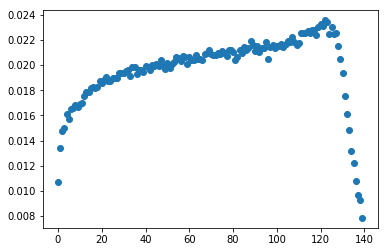

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(losses, 'o')

In [86]:
len( word2vec.vocab)

3000000

In [88]:
expanded_embedding = {}
k = 0
for word in word2vec.vocab:
    word_embedding = linear_model(torch.FloatTensor(word2vec[word]))
    expanded_embedding[word] = word_embedding.reshape(-1)
    k += 1
    if k % 10000 == 0:
        print('I am fine')

I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine
I am fine


In [96]:
for word in vocab_for_model:
    expanded_embedding[word] = model_embedding[vocab_for_model[word]]
        

In [126]:
import pickle
def save_expansion(embedding_map):
    embeddings = []
    vocab_dict = {}
    for idx, (word, emb) in enumerate(embedding_map.items()):
        try:
            vector = emb.detach().numpy()
        except:
            vector = emb
        embeddings.append(vector)
        vocab_dict[word] = int(idx)
    embeddings = np.array(embeddings)
    assert embeddings.shape[0] == len(embedding_map)
    np.save('embeddings_expanded.npy', embeddings)
    with open('vocab_expanded.pkl', 'wb') as f:
        pickle.dump(vocab_dict, f)

In [127]:
save_expansion(expanded_embedding)